In [2]:
# load packages
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from scipy.stats import ttest_1samp
#import umap
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [3]:
# import scanner behavioral ratings
root = '/Users/lindseytepfer/Dartmouth College Dropbox/Lindsey Tepfer/iNarr/'

ns = 28
bsdat = []
for i in tqdm(range(ns)):
    bsdat.append(pd.read_csv(root+"trait-ratings/sub_" + str(i+1) + "_ratings.csv"))
bsdat = pd.concat(bsdat)
bsdat

100%|██████████| 28/28 [00:00<00:00, 809.41it/s]


,idratings,subID,trial,trait,target,response,RT,version
0,537,1,1,easygoing,ID170_vid7_00_02,5,1.698680e+12,1
1,538,1,2,easygoing,ID112_vid1_00_07,3,1.120200e+04,1
2,539,1,3,easygoing,ID164_vid3_00_25,4,1.162000e+03,1
3,540,1,4,easygoing,physical,4,8.990000e+02,1
4,541,1,5,easygoing,ID181_vid6_00_01,3,9.700000e+02,1
...,...,...,...,...,...,...,...,...
175,4883,28,176,easygoing,ID112_vid1_00_07,5,2.231000e+03,2
176,4884,28,177,easygoing,ID153_vid3_00_46,6,1.683000e+03,2
177,4885,28,178,easygoing,stutterer,3,2.574000e+03,2
178,4886,28,179,easygoing,ID128_vid5_00_06,5,2.711000e+03,2


In [4]:
# get traits
traits = np.unique(bsdat.trait)
ntr = len(traits)
traits

array(['bossy', 'conscientious', 'easygoing', 'humble', 'nosy',
       'rebellious'], dtype=object)

In [5]:
# get targets
targs = np.unique(bsdat.target)
nta = len(targs)
targs

array(['ID111_vid3_00_10', 'ID112_vid1_00_07', 'ID113_vid4_00_03',
       'ID116_vid2_00_03', 'ID117_vid4_00_03', 'ID118_vid1_00_02',
       'ID120_vid4_00_02', 'ID121_vid6_00_07', 'ID123_vid3_00_02',
       'ID124_vid6_00_06', 'ID127_vid3_00_05', 'ID128_vid5_00_06',
       'ID129_vid6_00_03', 'ID130_vid6_00_02', 'ID131_vid2_00_01',
       'ID137_vid6_01_20', 'ID141_vid1_00_04', 'ID145_vid4_00_27',
       'ID147_vid4_00_11', 'ID153_vid3_00_46', 'ID156_vid3_00_01',
       'ID161_vid1_00_02', 'ID164_vid3_00_25', 'ID165_vid7_00_10',
       'ID168_vid1_00_05', 'ID169_vid2_00_01', 'ID170_vid7_00_02',
       'ID171_vid5_00_08', 'ID174_vid2_00_04', 'ID179_vid3_00_01',
       'ID180_vid6_01_10', 'ID181_vid6_00_01', 'physical', 'stutterer'],
      dtype=object)

In [6]:
# compute rating array
tmat = np.full((ns,ntr,nta), np.nan)
for i in tqdm(range(ns)):
    for j in range(ntr):
        for k in range(nta):
            tmat[i,j,k] = np.mean(bsdat.response[np.logical_and(bsdat.target==targs[k],np.logical_and(bsdat.subID==(i+1),bsdat.trait==traits[j]))])
tmat_p = tmat[:,:,-2]
tmat_s = tmat[:,:,-1]

100%|██████████| 28/28 [00:02<00:00, 11.97it/s]


In [7]:
# get versions and order
versions = np.array(bsdat.groupby("subID")["version"].median())
versions = versions.astype('int')
vord = np.argsort(versions)
vmod = pairwise_distances(versions.reshape(-1, 1))
versions

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2])

In [9]:
# load mean online data
ponline1 = pd.read_csv(root+"online-experiment/physical_online_average_v1.csv")
ponline2 = pd.read_csv(root+"online-experiment/physical_online_average_v2.csv")
sonline1 = pd.read_csv(root+"online-experiment/stutterer_online_average_v1.csv")
sonline2 = pd.read_csv(root+"online-experiment/stutterer_online_average_v2.csv")

In [10]:
# consensus - physical - scanner
pcorr = np.corrcoef(tmat_p)
pcorr = pcorr[np.tril_indices_from(pcorr, k=-1)]
#medp = np.median(pcorr)
#medp 

#report the mean r value
meanp = np.mean(pcorr)
meanp

0.5474529540190344

In [11]:
# consensus - stutterer - scanner
scorr = np.corrcoef(tmat_s)
scorr = scorr[np.tril_indices_from(scorr, k=-1)]
meds = np.median(scorr)
meds 

#report the mean r value
means = np.mean(scorr)
means

0.8053409582845796

In [10]:
# correlation across targets - scanner
np.median(np.corrcoef(tmat_s,tmat_p)[:28,28:])

np.float64(-0.5949644738990751)

100%|██████████| 5000/5000 [00:00<00:00, 20899.50it/s]


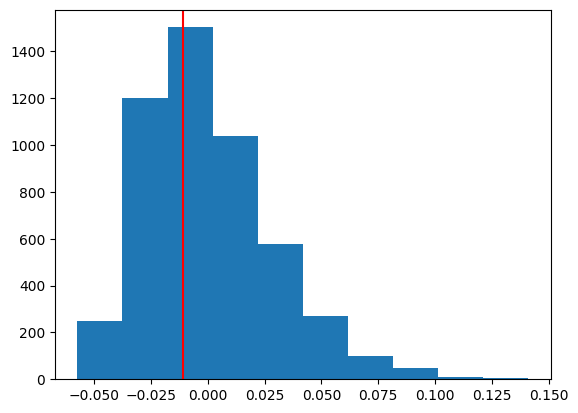

In [ ]:
# version effect - scanner testing via RSA, 
pdist = pairwise_distances(tmat_p)
sdist = pairwise_distances(tmat_s)
sel = np.tril_indices_from(pdist, k=-1)

truestat = np.mean((np.corrcoef(pdist[sel],vmod[sel])[0,1],np.corrcoef(sdist[sel],vmod[sel])[0,1]))
truestat

nperm=5000
permstat = np.zeros(nperm)
for i in tqdm(range(nperm)):
    rsel = np.random.choice(ns,ns,replace=False)
    permstat[i] = np.mean((np.corrcoef(pdist[rsel,:][:,rsel][sel],vmod[sel])[0,1],np.corrcoef(sdist[rsel,:][:,rsel][sel],vmod[sel])[0,1]))

plt.hist(permstat);
plt.axvline(truestat,color="red")



In [17]:
#this is a mean r value
print(truestat)

#the true statistic compared to the absolute value of the permstat, this gives the pvalue
print(np.mean(abs(permstat) >= truestat))


-0.011163178734453879
1.0


In [18]:
# correlation with online ratings - final time point
pso = np.concatenate((np.corrcoef(ponline1,tmat_p[versions==1])[25,26:],np.corrcoef(ponline2,tmat_p[versions==2])[25,26:]))
sso = np.concatenate((np.corrcoef(sonline1,tmat_s[versions==1])[25,26:],np.corrcoef(sonline2,tmat_s[versions==2])[25,26:]))
print(np.median(pso))
print(np.median(sso))

0.7424479870998074
0.8623312794591194


In [19]:
ttest_1samp(pso,0)

TtestResult(statistic=11.714250730305086, pvalue=4.299001323740697e-12, df=27)

In [20]:
ttest_1samp(sso,0)

TtestResult(statistic=32.62743922584287, pvalue=3.141379887511336e-23, df=27)

In [22]:
# load raw online data
odat = pd.read_csv(root+"online-experiment/inarr-online-results.csv")
omean = odat.groupby(["movie","version","round","trait"]).ratings.mean()
odat.head()

,Unnamed: 0,userID,movie,version,trait,ratings,seen,age,sex,gender,ethnic,race,edu,round
0,0,c6677453-e66c-422a-af6d-2d37a8d6fb20,physical,1,Rebellious,3,2,37,1,1,2,8,4,0
1,0,c6677453-e66c-422a-af6d-2d37a8d6fb20,physical,1,Rebellious,2,2,37,1,1,2,8,4,1
2,0,c6677453-e66c-422a-af6d-2d37a8d6fb20,physical,1,Rebellious,2,2,37,1,1,2,8,4,2
3,0,c6677453-e66c-422a-af6d-2d37a8d6fb20,physical,1,Rebellious,2,2,37,1,1,2,8,4,3
4,0,c6677453-e66c-422a-af6d-2d37a8d6fb20,physical,1,Rebellious,2,2,37,1,1,2,8,4,4


In [23]:
# compute true test statistics
movies = ["physical","stutterer"]
odist = np.zeros((2,26))
for i in range(2):
    for j in range(26):
        odist[i,j] = np.sqrt(np.mean(np.power(omean[movies[i]][1][j]-omean[movies[i]][2][j],2)))

# euclidean distance measure - in trait space 

In [ ]:
im_incr = np.mean(np.diff(odist)[:,np.arange(1,25,2)]) #how much versions increase after internal monologue
#report with their own confidence intervals after the bootstrapping

In [26]:
nim_decr = np.mean(np.diff(odist)[:,np.arange(0,25,2)]) #how much versions decrease after NONinternal monologue

In [ ]:
im_incr - nim_decr

0.21989847798252338

In [200]:
# bootstrap
nboot = 5000
bodist = np.zeros((nboot,2,26))
uid = np.unique(odat.userID)
nu = len(uid)
np.random.seed(0)
for b in tqdm(range(nboot)):
    blist = []
    for i in range(nu):
        blist.append(odat.loc[odat.userID==np.random.choice(uid,1)[0],:])
    bdat = pd.concat(blist)
    bomean = bdat.groupby(["movie","version","round","trait"]).ratings.mean()
    for i in range(2):
        for j in range(26):
            set1 = set(list(bomean[movies[i]][1][j].index))
            inters = list(set1.intersection(set(list(bomean[movies[i]][2][j].index))))
            bodist[b,i,j] = np.sqrt(np.mean(np.power(bomean[movies[i]][1][j][inters]-bomean[movies[i]][2][j][inters],2)))

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [22:53<00:00,  3.64it/s]


In [ ]:
np.quantile(np.mean(np.diff(bodist)[:,:,np.arange(1,25,2)],axis=(1,2)),(.025,.975))

#here are the confidence intervals to report

array([0.01231538, 0.16389045])

In [202]:
np.quantile(np.mean(np.diff(bodist)[:,:,np.arange(0,25,2)],axis=(1,2)),(.025,.975))

array([-0.16883926, -0.00849485])

In [ ]:
np.quantile(np.mean(np.diff(bodist)[:,:,np.arange(1,25,2)],axis=(1,2))-np.mean(np.diff(bodist)[:,:,np.arange(0,25,2)],axis=(1,2)),(.025,.975))

#this is the big bar at the top, the difference between the two 

array([0.02550137, 0.32587398])